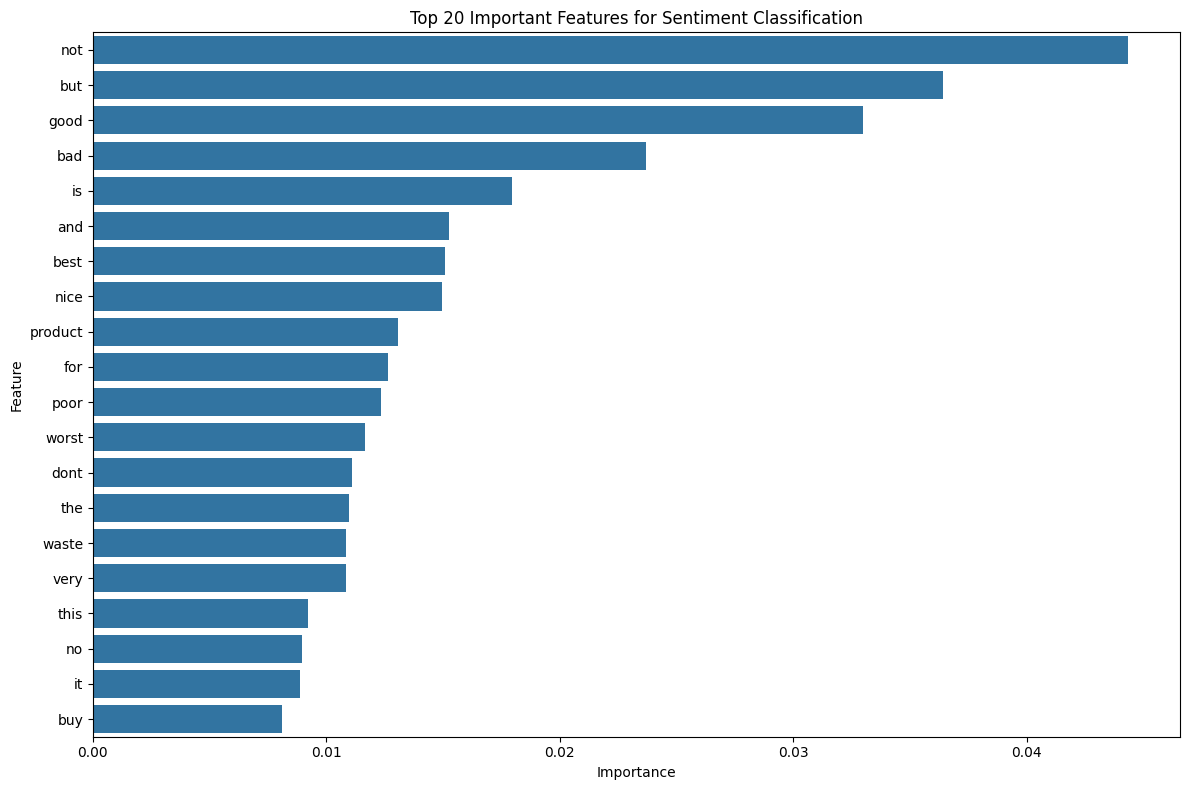

<Figure size 1000x800 with 0 Axes>

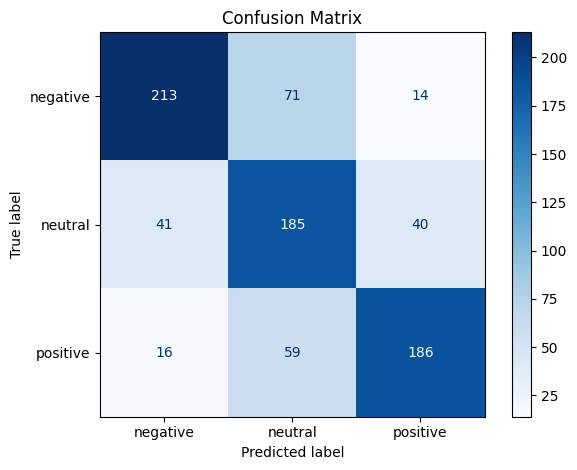


Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.71      0.75       298
     neutral       0.59      0.70      0.64       266
    positive       0.78      0.71      0.74       261

    accuracy                           0.71       825
   macro avg       0.72      0.71      0.71       825
weighted avg       0.72      0.71      0.71       825



In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv('filtered_reviews.csv')

# 准备特征和目标变量
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['Summary'].astype(str))
y = data['Sentiment']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 进行预测
y_pred = rf_classifier.predict(X_test)

# 获取特征重要性
feature_importances = rf_classifier.feature_importances_

# 创建特征重要性DataFrame
features_df = pd.DataFrame({
    'feature': tfidf_vectorizer.get_feature_names_out(),
    'importance': feature_importances
})

# 按重要性排序
features_df = features_df.sort_values(by='importance', ascending=False)

# 显示前20个重要特征
plt.figure(figsize=(12, 8))
top_features = features_df.head(20)
sns.barplot(x=top_features['importance'], y=top_features['feature'])
plt.title('Top 20 Important Features for Sentiment Classification')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data['Sentiment'].unique())
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# 打印分类报告
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

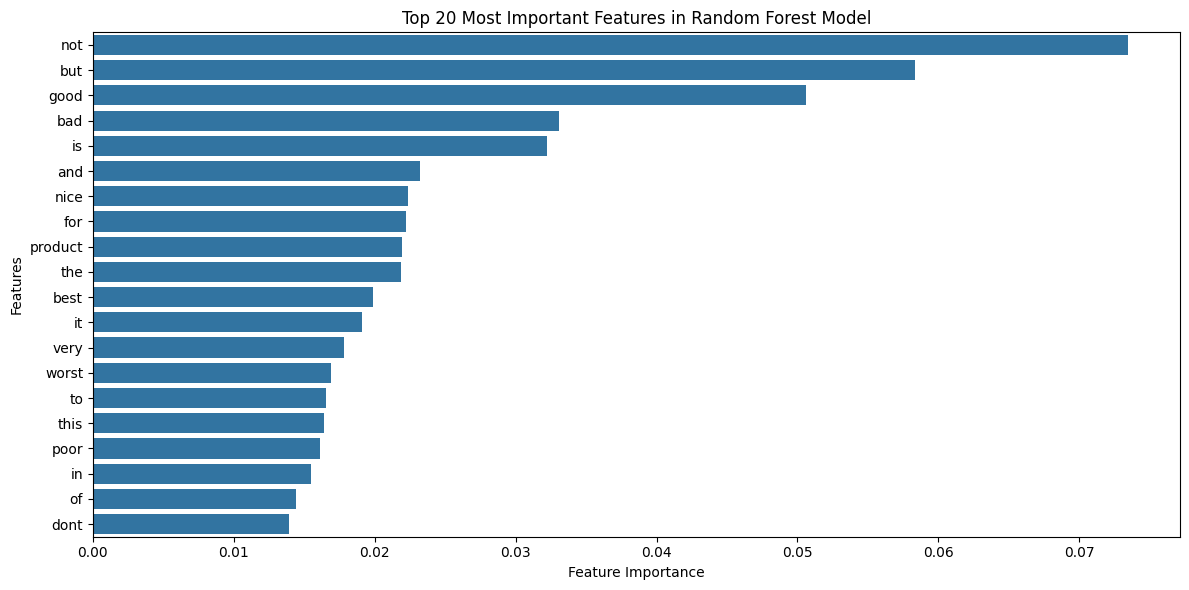

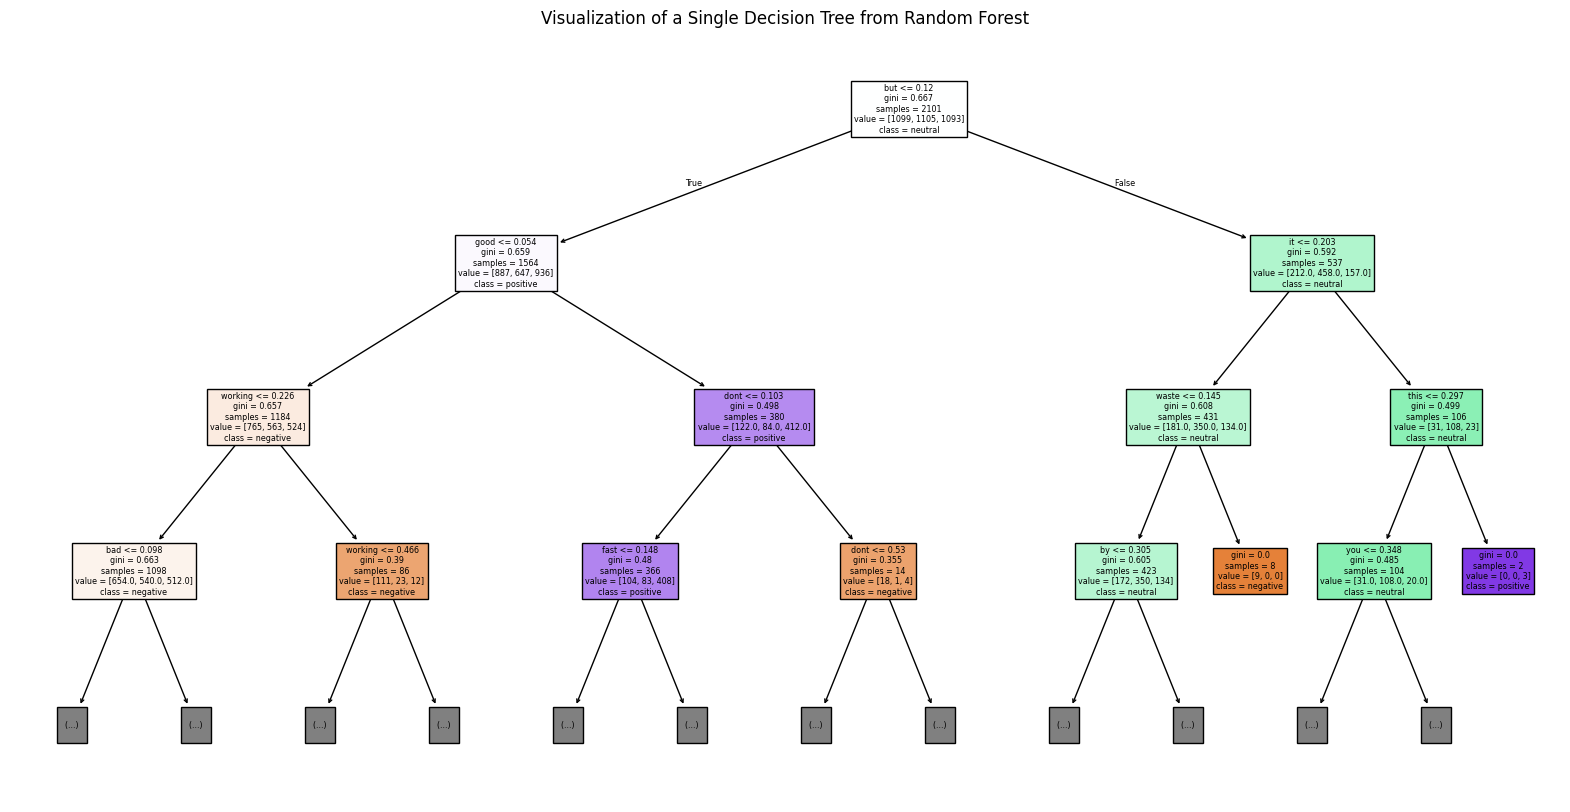

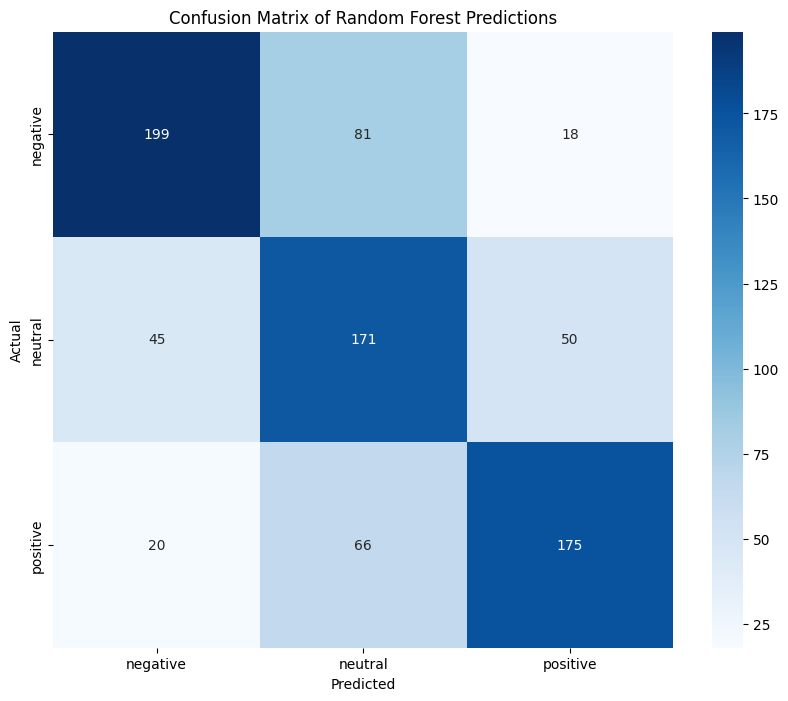


Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.67      0.71       298
     neutral       0.54      0.64      0.59       266
    positive       0.72      0.67      0.69       261

    accuracy                           0.66       825
   macro avg       0.67      0.66      0.66       825
weighted avg       0.67      0.66      0.66       825



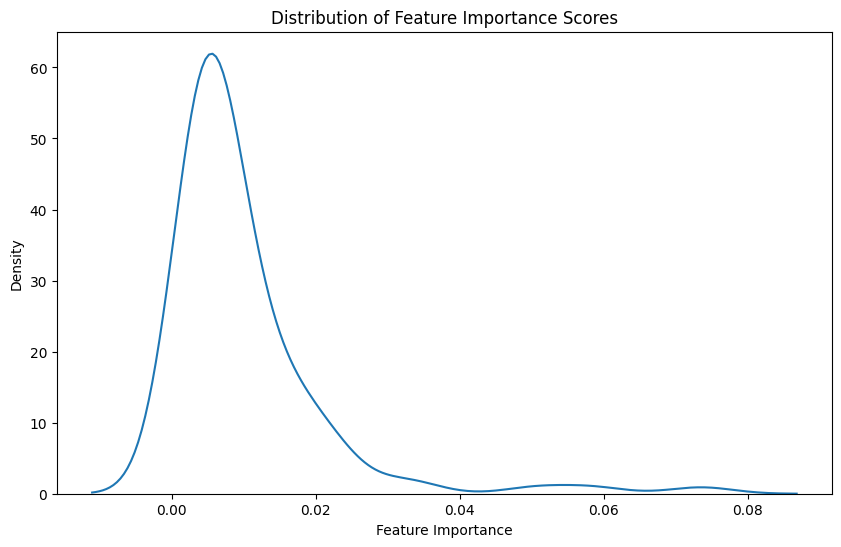

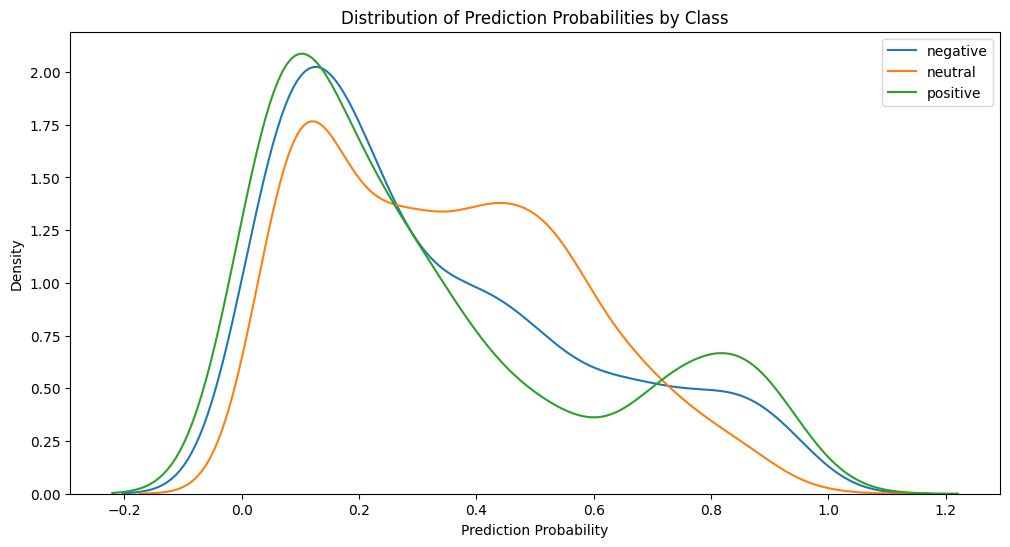

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load and prepare data
df = pd.read_csv('filtered_reviews.csv')

# Prepare features using TF-IDF
tfidf = TfidfVectorizer(max_features=100)
X = tfidf.fit_transform(df['Summary'].astype(str))
y = df['Sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 1. Feature Importance Visualization
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': tfidf.get_feature_names_out(),
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(20)

sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 20 Most Important Features in Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# 2. Single Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], 
          feature_names=tfidf.get_feature_names_out(),
          class_names=rf.classes_,
          filled=True,
          max_depth=3)
plt.title('Visualization of a Single Decision Tree from Random Forest')
plt.show()

# 3. Model Performance Visualization
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Make predictions
y_pred = rf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=rf.classes_,
            yticklabels=rf.classes_)
plt.title('Confusion Matrix of Random Forest Predictions')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. Feature Importance Distribution
plt.figure(figsize=(10,6))
sns.kdeplot(data=rf.feature_importances_)
plt.title('Distribution of Feature Importance Scores')
plt.xlabel('Feature Importance')
plt.ylabel('Density')
plt.show()

# 6. Prediction Probability Distribution
pred_proba = rf.predict_proba(X_test)
plt.figure(figsize=(12,6))
for i, label in enumerate(rf.classes_):
    sns.kdeplot(pred_proba[:,i], label=label)
plt.title('Distribution of Prediction Probabilities by Class')
plt.xlabel('Prediction Probability')
plt.ylabel('Density')
plt.legend()
plt.show()